In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
%reload_ext autoreload
%autoreload 2



In [26]:
df = pd.read_csv("data\datalog_1.csv", parse_dates=True, header=None) #, index_col="Datetime"
df.columns = ["Datetime","Temperature", "Humidity" , "Pressure", "Altitude" ,"CO" ,"CO2" ,"NH4", "PM1.0" ,"PM2.5", "PM10.0"]
df['Datetime'] = pd.to_datetime(df["Datetime"], format='%Y-%m-%d %H:%M:%S')

quantities = ['Temperature', 'Rel. Humidity', 'Pressure', 'CO', r'CO$_2$', r'NH$_3$', r'PM$_{1}$', 
                  'PM$_{2.5}$', 'PM$_{10}$']
units = [r'$^o$C','%', 'hPa','ppm','ppm','ppm',r'$\mu g/m^3$ ',r'$\mu g/m^3$ ',r'$\mu g/m^3$ ']
df = df.set_index("Datetime")
df['Pressure'] = df['Pressure']/100


In [3]:
df.head(10)

Temperature  Humidity  Pressure  Altitude    CO     CO2  \
Datetime                                                                      
2023-6-14 12:38:10        24.33     50.30  984.6506    240.88  3.52  402.62   
2023-6-14 12:38:11        24.32     50.27  984.6506    240.88  3.06  402.37   
2023-6-14 12:38:11        24.33     50.26  984.6491    240.89  4.84  403.30   
2023-6-14 12:38:12        24.33     50.25  984.6492    240.89  3.44  402.57   
2023-6-14 12:38:14        24.34     50.19  984.6497    240.89  3.21  402.45   
2023-6-14 13:9:4          21.73     49.23  984.1584    245.07  3.26  402.48   
2023-6-14 13:9:5          21.73     49.26  984.1567    245.09  2.97  402.31   
2023-6-14 13:9:6          21.72     49.28  984.1569    245.09  3.64  402.68   
2023-6-14 13:9:7          21.73     49.30  984.1570    245.08  2.95  402.30   
2023-6-14 13:9:8          21.75     49.34  984.1589    245.07  2.82  402.23   

                     NH4  PM1.0  PM2.5  PM10.0  
Datetime                                        
2023-6-14 12:38:10  4.03   14.0   15.0    19.0  
2023-6-14 12:38:11  3.69   14.0   15.0    18.0  
2023-6-14 12:38:11  4.92   15.0   16.0    18.0  
2023-6-14 12:38:12  3.97   13.0   14.0    17.0  
2023-6-14 12:38:14  3.80   14.0   16.0    17.0  
2023-6-14 13:9:4    3.84   14.0   17.0    18.0  
2023-6-14 13:9:5    3.62   14.0   17.0    18.0  
2023-6-14 13:9:6    4.11   14.0   17.0    18.0  
2023-6-14 13:9:7    3.61   13.0   16.0    17.0  
2023-6-14 13:9:8    3.51   14.0   17.0    18.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18714 entries, 2023-6-14 12:38:10 to 2023-6-16 14:30:30
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  18714 non-null  float64
 1   Humidity     18714 non-null  float64
 2   Pressure     18714 non-null  float64
 3   Altitude     18714 non-null  float64
 4   CO           18714 non-null  float64
 5   CO2          18714 non-null  float64
 6   NH4          18714 non-null  float64
 7   PM1.0        18714 non-null  float64
 8   PM2.5        18714 non-null  float64
 9   PM10.0       18714 non-null  float64
dtypes: float64(10)
memory usage: 1.6+ MB


In [5]:
df.describe()

Temperature      Humidity      Pressure      Altitude            CO  \
count  18714.000000  18714.000000  18714.000000  18714.000000  18714.000000   
mean      28.113811     45.612353    984.232511    244.446396      0.895296   
std        1.301268      5.011934      1.252583     10.677262      0.476700   
min       21.720000     32.730000    981.730600    225.020000      0.280000   
25%       27.470000     43.212500    983.382725    237.790000      0.640000   
50%       27.710000     45.880000    984.227400    244.485000      0.770000   
75%       28.060000     47.480000    985.012950    251.690000      1.090000   
max       31.900000     58.960000    986.513400    265.790000     18.590000   

                CO2           NH4         PM1.0         PM2.5        PM10.0  
count  18714.000000  18714.000000  18714.000000  18714.000000  18714.000000  
mean     400.947791      1.663224     16.369830     23.829539     24.697713  
std        0.337774      0.501055     10.172439     15.584928     16.244789  
min      400.420000      0.830000      6.000000      9.000000      9.000000  
25%      400.760000      1.390000     11.000000     16.000000     17.000000  
50%      400.870000      1.550000     14.000000     20.000000     21.000000  
75%      401.120000      1.930000     17.000000     25.000000     26.000000  
max      408.780000     11.460000     74.000000    117.000000    121.000000

# Particulate Matter Analysis

In [30]:
part_mt  = df[["PM1.0", "PM2.5", "PM10.0"]]
part_mt.describe()

PM1.0         PM2.5        PM10.0
count  18714.000000  18714.000000  18714.000000
mean      16.369830     23.829539     24.697713
std       10.172439     15.584928     16.244789
min        6.000000      9.000000      9.000000
25%       11.000000     16.000000     17.000000
50%       14.000000     20.000000     21.000000
75%       17.000000     25.000000     26.000000
max       74.000000    117.000000    121.000000

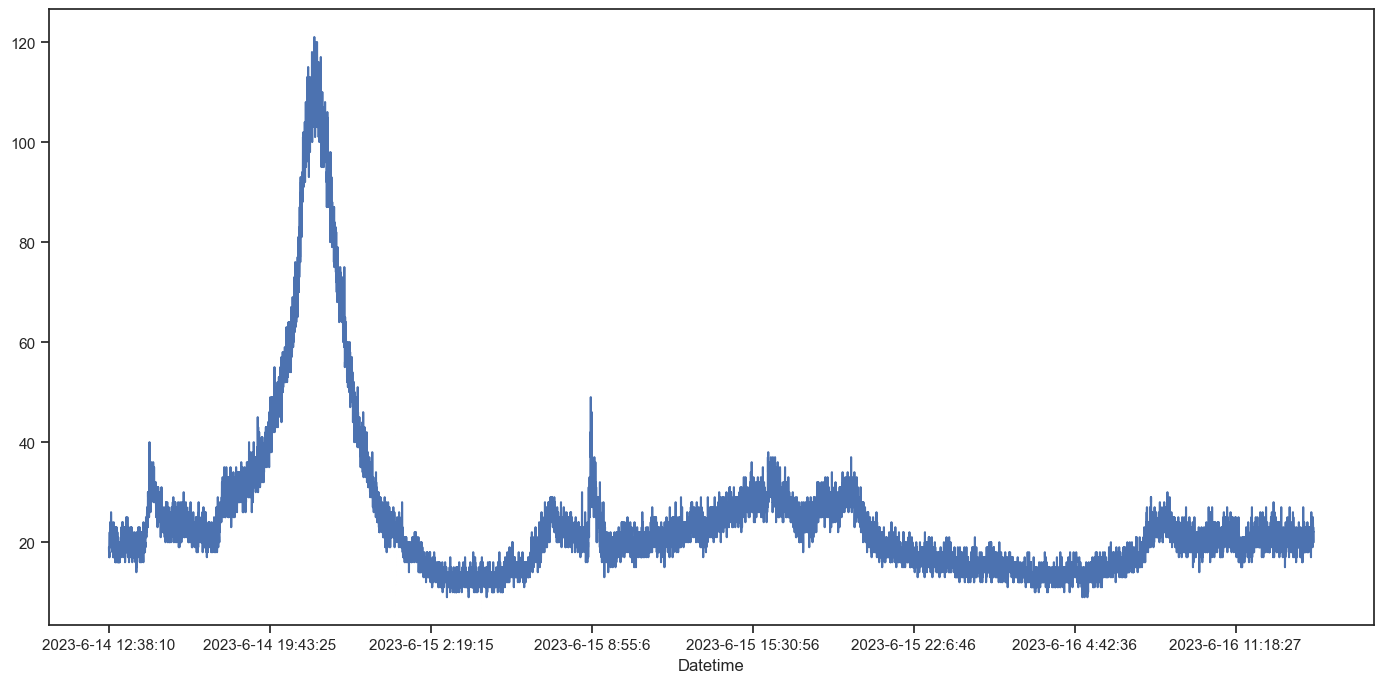

In [27]:
part_mt["PM10.0"].plot( figsize=(14,7))

plt.tight_layout()
plt.show()

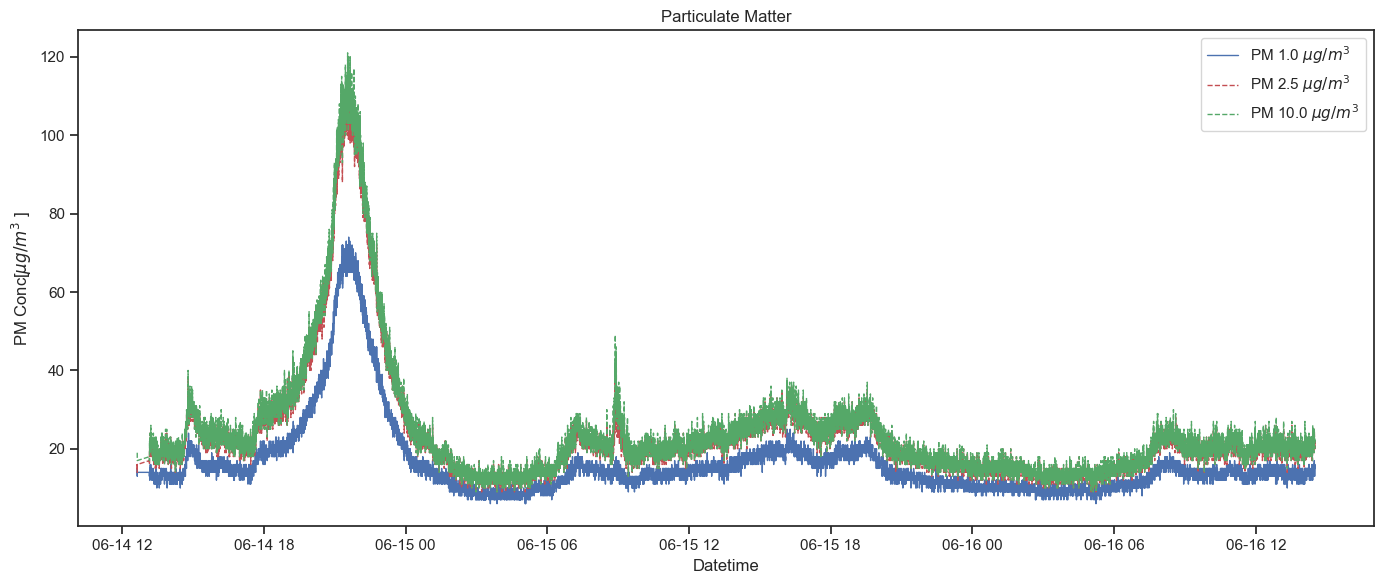

In [31]:
fig, ax = plt.subplots(figsize= (14, 6))

ax.plot( part_mt["PM1.0"], linestyle="solid", label= f"PM 1.0 {units[6]}", color="b", linewidth=1)
ax.plot( part_mt["PM2.5"], linestyle="dashed", label= f"PM 2.5 {units[7]}", color="r", linewidth=1)
ax.plot( part_mt["PM10.0"], linestyle="dashed", label= f"PM 10.0 {units[6]}", color="g", linewidth=1)

ax.legend()
ax.set_title("Particulate Matter")
ax.set_xlabel("Datetime")
ax.set_ylabel(f"PM Conc[{units[6]}]")

plt.tight_layout()
plt.show()

## Numerical Analysis For seperate PM

In [48]:
def num_ana(ax, part, title): 
    ax = part_mt[part].plot(kind='density', figsize=(14,6), ax=ax) # kde
    ax.axvline(part_mt[part].mean(), color='red', label="mean")
    ax.axvline(part_mt[part].median(), color='green', label="median")


    ax.legend()
    #ax.set_title(f"{title} {units[6]}")
    


[]

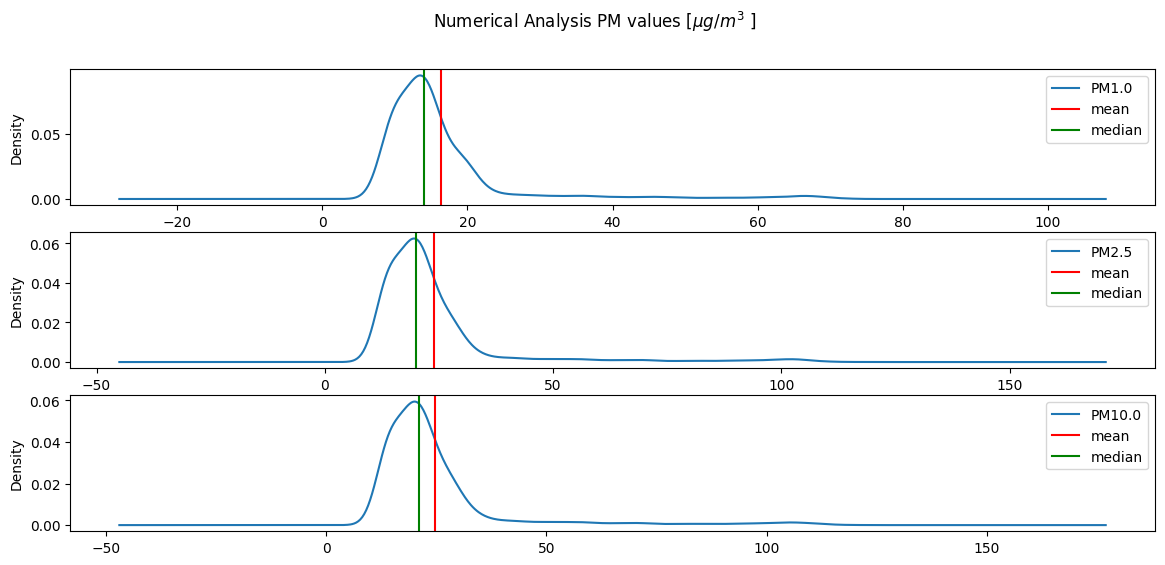

In [49]:
plot_objects = plt.subplots(nrows=3, ncols=1, figsize=(16, 10))

fig, ((ax1) ,(ax2) , (ax3)) = plot_objects

num_ana(ax1, "PM1.0", "Particulate Matter 1.0")
num_ana(ax2, "PM2.5", "Particulate Matter 2.5")
num_ana(ax3, "PM10.0", "Particulate Matter 10.0")

fig.suptitle(f"Numerical Analysis PM values [{units[6]}]")

plt.plot()

Relations With Temperature

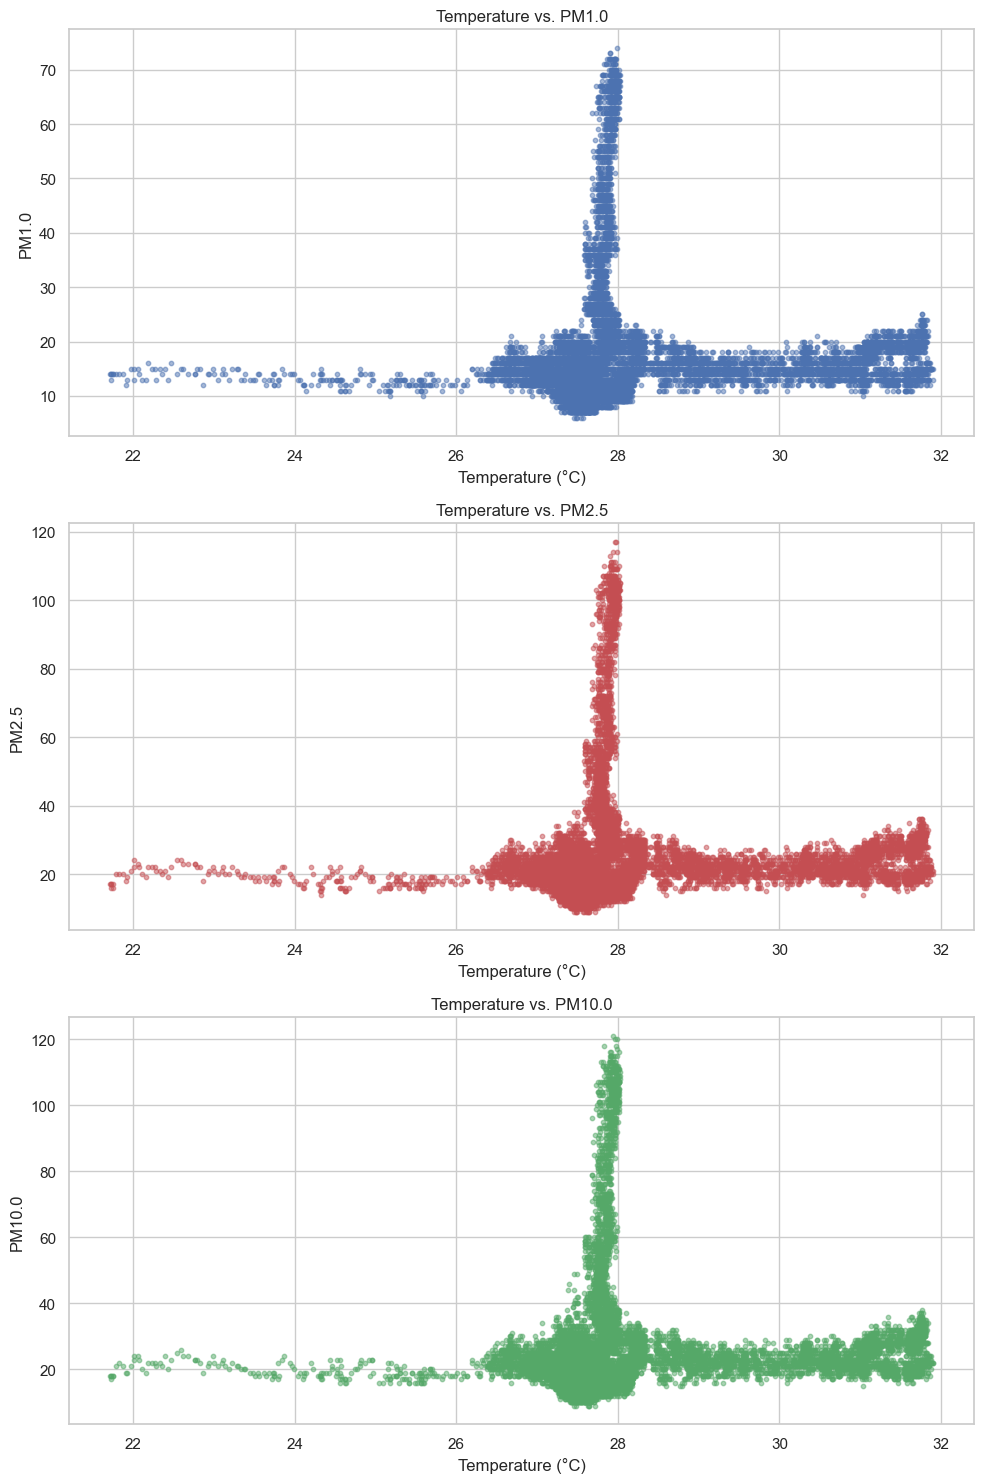

In [24]:
# Plotting Temperature against PM1.0, PM2.5, and PM10.0
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plot Temperature vs. PM1.0
axes[0].scatter(df['Temperature'], df['PM1.0'], s=10, alpha=0.5)
axes[0].set_xlabel('Temperature (°C)')
axes[0].set_ylabel('PM1.0')
axes[0].set_title('Temperature vs. PM1.0')

# Plot Temperature vs. PM2.5
axes[1].scatter(df['Temperature'], df['PM2.5'], s=10, alpha=0.5, color='r')
axes[1].set_xlabel('Temperature (°C)')
axes[1].set_ylabel('PM2.5')
axes[1].set_title('Temperature vs. PM2.5')

# Plot Temperature vs. PM10.0
axes[2].scatter(df['Temperature'], df['PM10.0'], s=10, alpha=0.5, color='g')
axes[2].set_xlabel('Temperature (°C)')
axes[2].set_ylabel('PM10.0')
axes[2].set_title('Temperature vs. PM10.0')

plt.tight_layout()
plt.show()


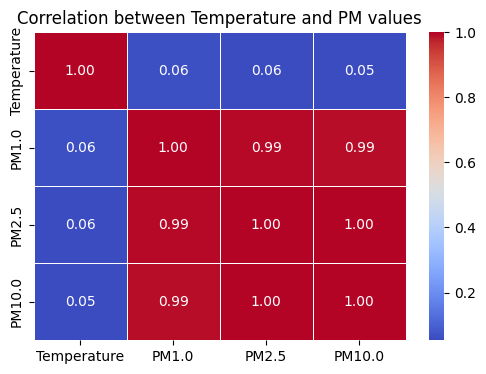

In [34]:
# Calculate the correlation matrix
correlation_matrix = df[["Temperature", "PM1.0" ,"PM2.5", "PM10.0"]].corr()

# Create a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation between Temperature and PM values')
plt.show()

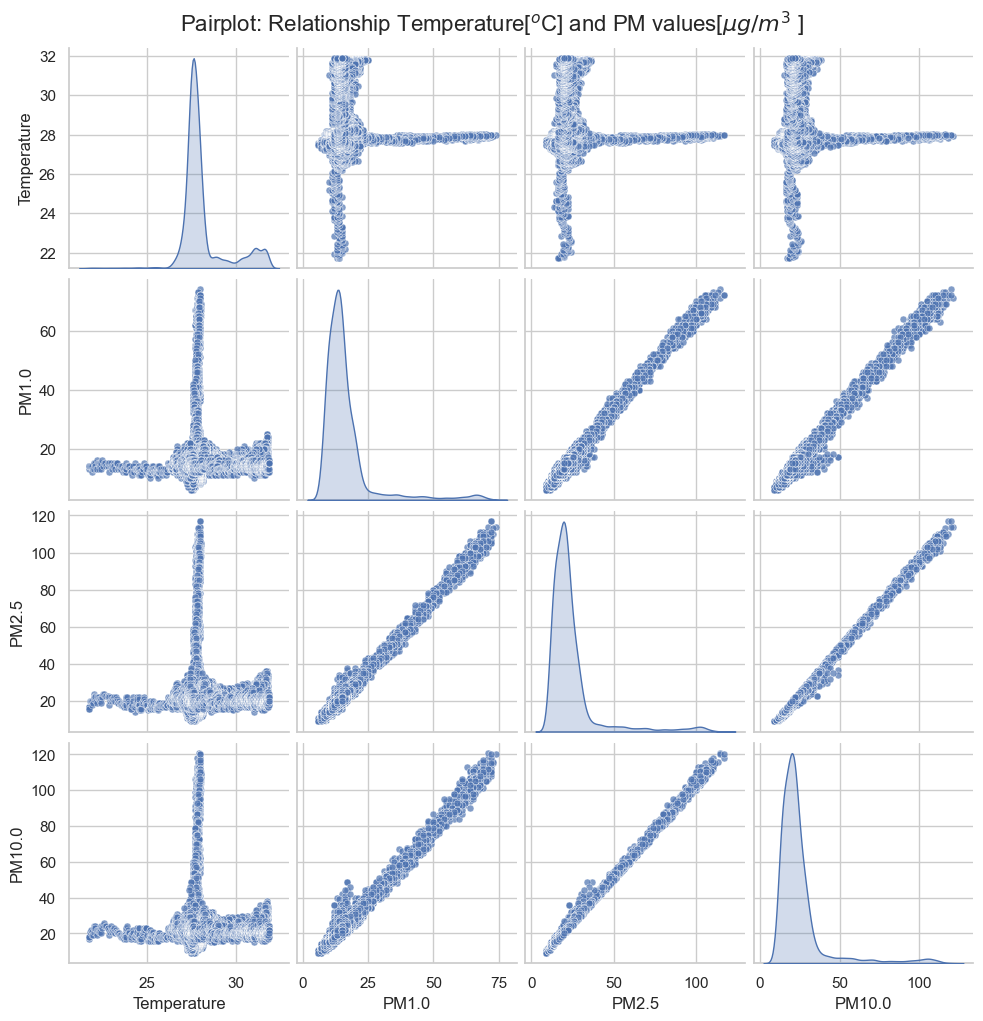

In [21]:
# Pairplot: Relationship between Temperature and PM
temp_pairplot_data = df[['Temperature', 'PM1.0', 'PM2.5', 'PM10.0']]
sns.set(style='whitegrid')
gt = sns.pairplot(temp_pairplot_data, diag_kind='kde', markers='o', plot_kws={'alpha': 0.7, 's': 25})

# Adjust title and axis labels
gt.fig.suptitle(f'Pairplot: Relationship Temperature[{units[0]}] and PM values[{units[6]}]', y=1.02, fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Variables', fontsize=12)


plt.show()


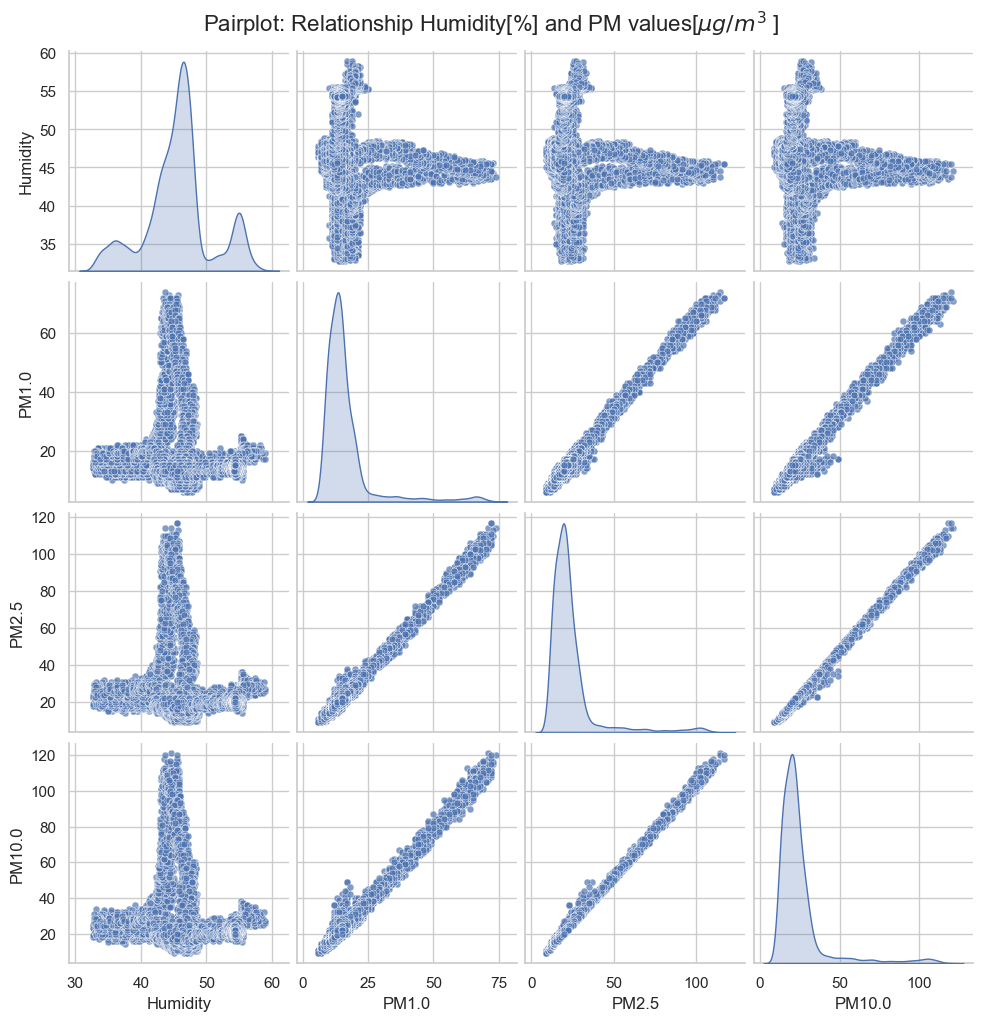

In [20]:
# Pairplot: Relationship between Humidity and PM
temp_pairplot_data = df[['Humidity', 'PM1.0', 'PM2.5', 'PM10.0']]
sns.set(style='whitegrid')
gt = sns.pairplot(temp_pairplot_data, diag_kind='kde', markers='o', plot_kws={'alpha': 0.7, 's': 25})

# Adjust title and axis labels
gt.fig.suptitle(f'Pairplot: Relationship Humidity[{units[1]}] and PM values[{units[6]}]', y=1.02, fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Variables', fontsize=12)


plt.show()

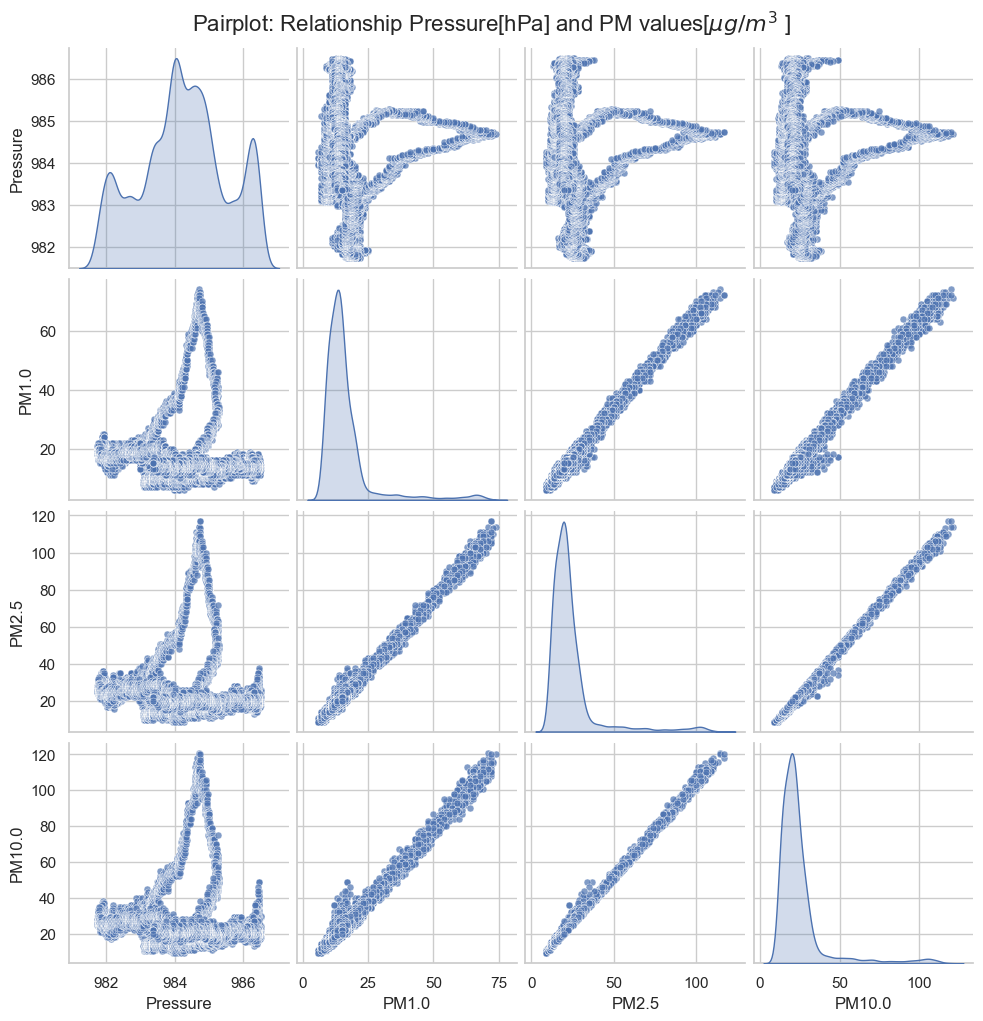

In [22]:
# Pairplot: Relationship between Humidity and PM
temp_pairplot_data = df[['Pressure', 'PM1.0', 'PM2.5', 'PM10.0']]
sns.set(style='whitegrid')
gt = sns.pairplot(temp_pairplot_data, diag_kind='kde', markers='o', plot_kws={'alpha': 0.7, 's': 25})

# Adjust title and axis labels
gt.fig.suptitle(f'Pairplot: Relationship Pressure[{units[2]}] and PM values[{units[6]}]', y=1.02, fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Variables', fontsize=12)


plt.show()

Pair plot of all the variables


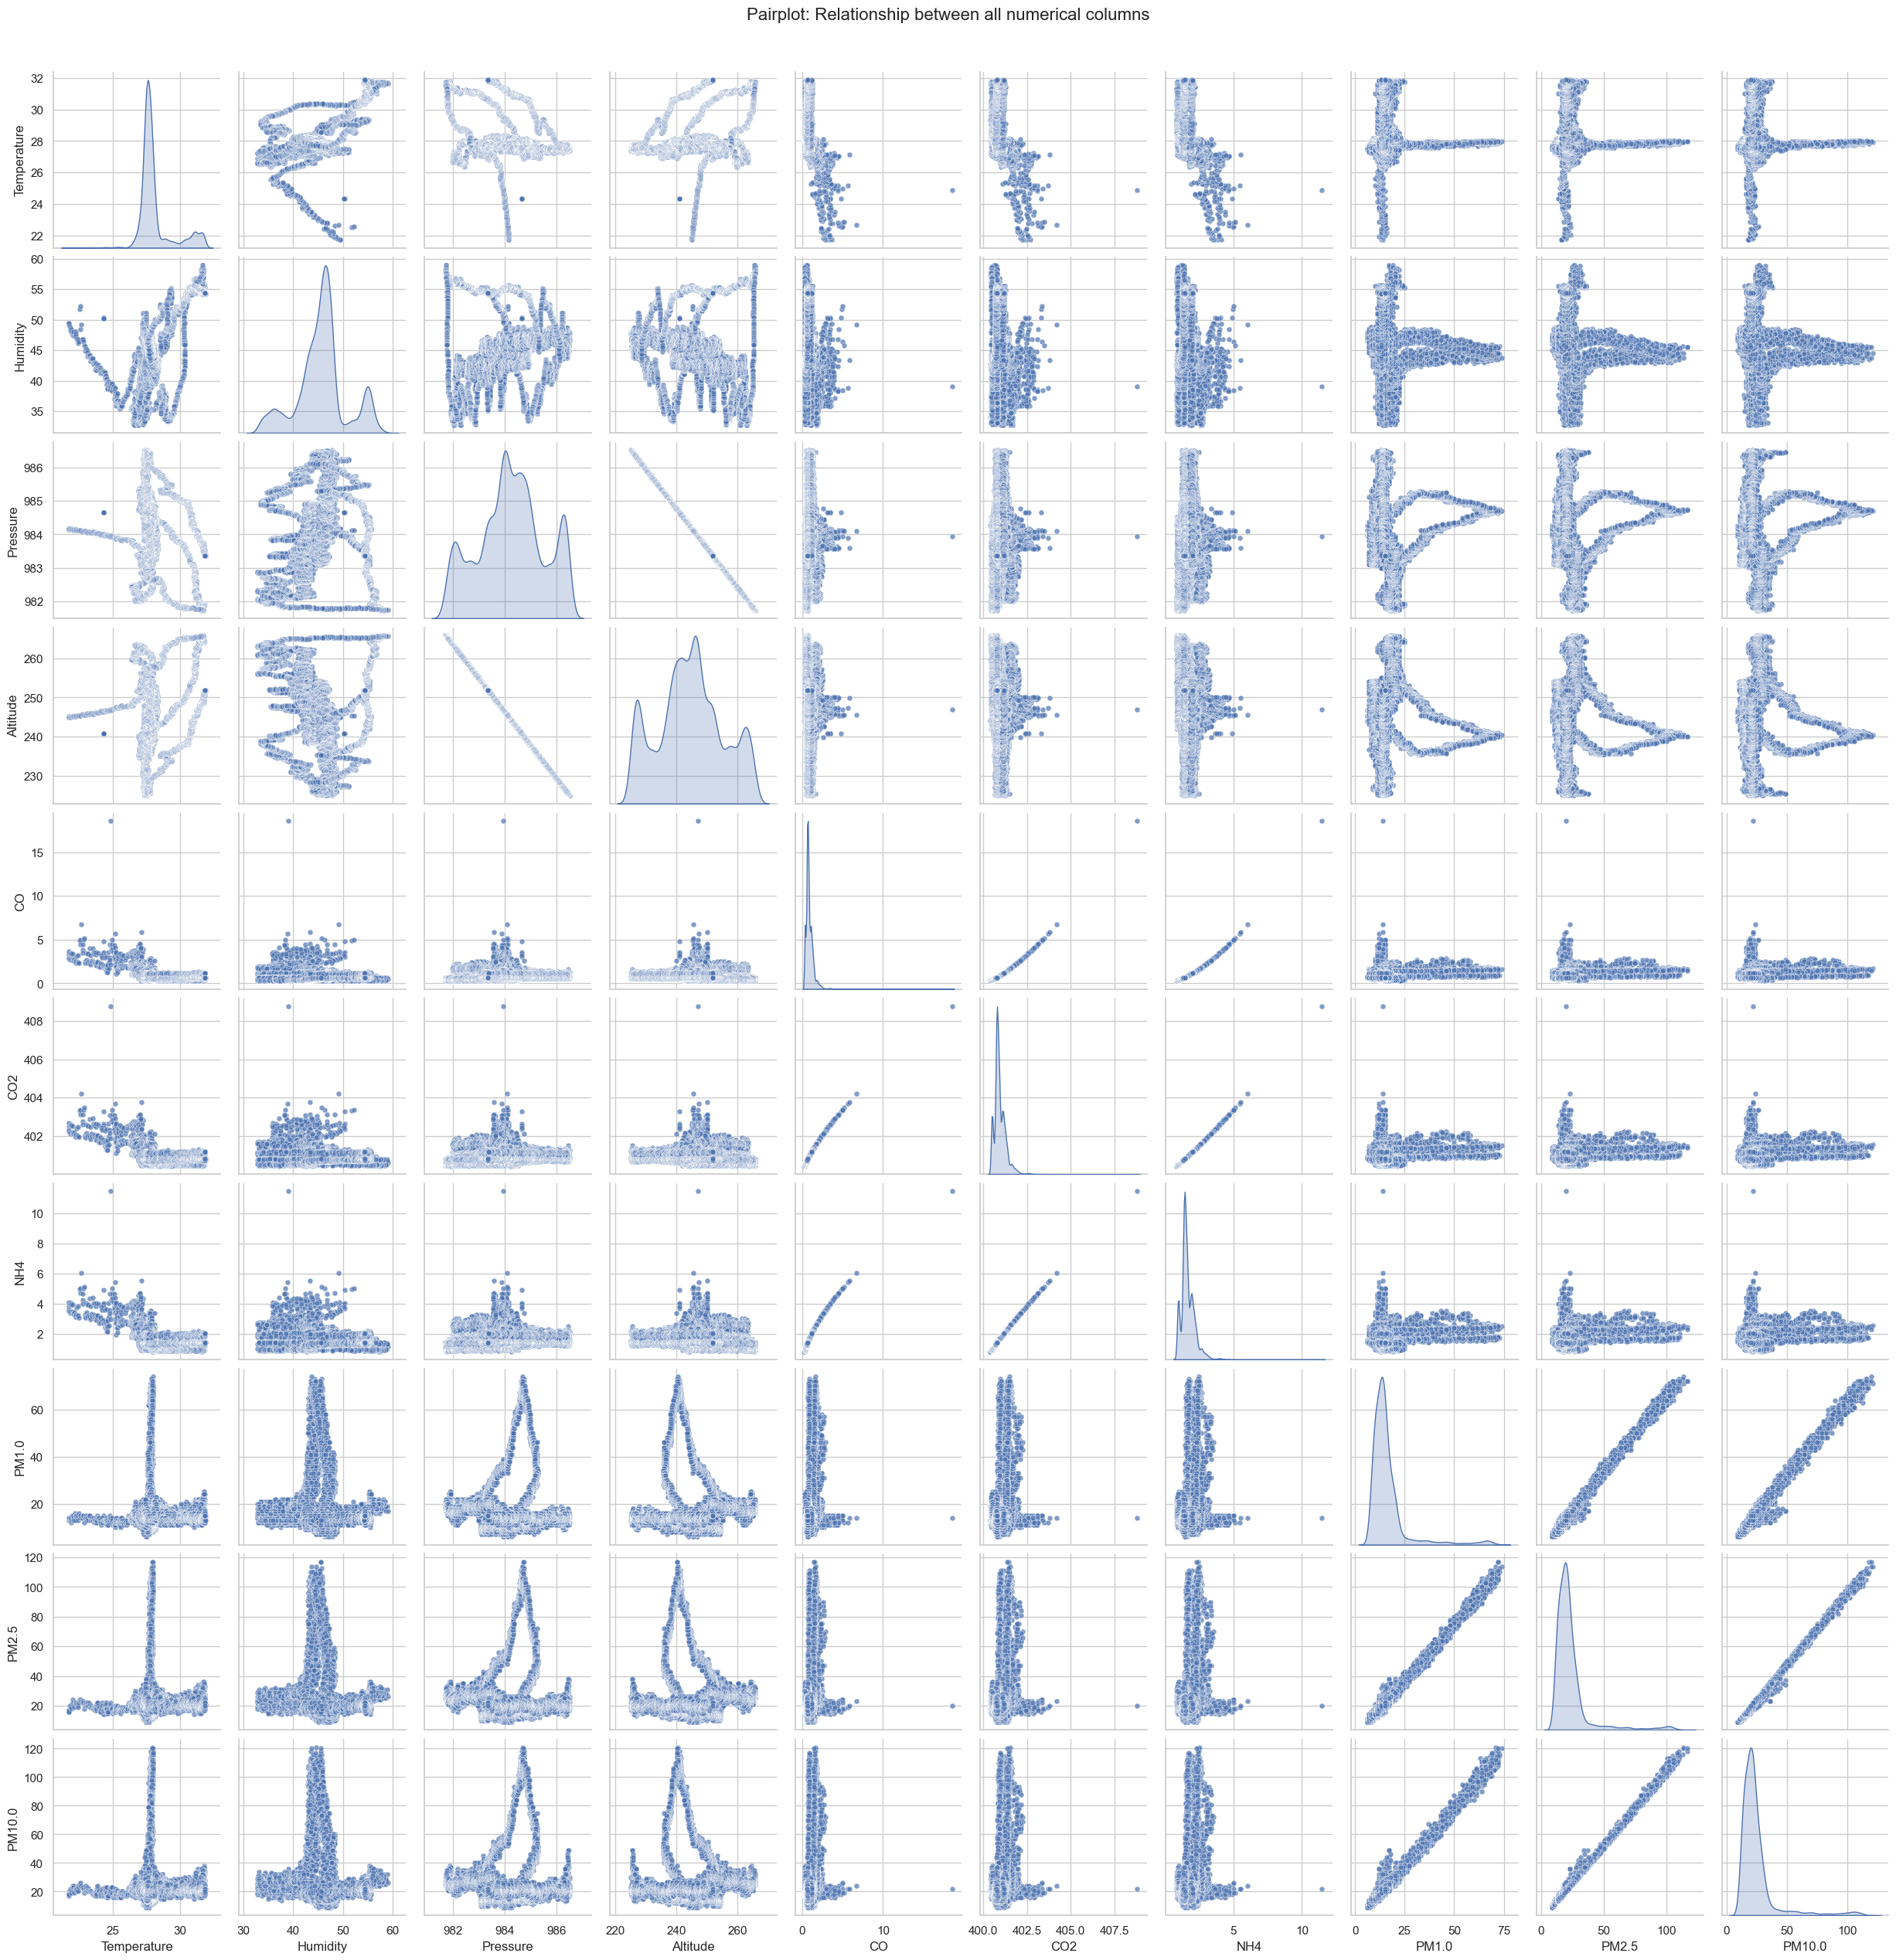

In [33]:
# Pairplot: Relationship between all numerical columns
pairplot_data = df[["Temperature", "Humidity" , "Pressure", "Altitude" ,"CO" ,"CO2" ,"NH4", "PM1.0" ,"PM2.5", "PM10.0"]]
sns.set(style='whitegrid')
g = sns.pairplot(pairplot_data, diag_kind='kde', markers='o', plot_kws={'alpha': 0.7, 's': 25})

# Adjust title and axis labels
g.fig.suptitle('Pairplot: Relationship between all numerical columns', y=1.02, fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Variables', fontsize=12)


plt.show()

General Correlation


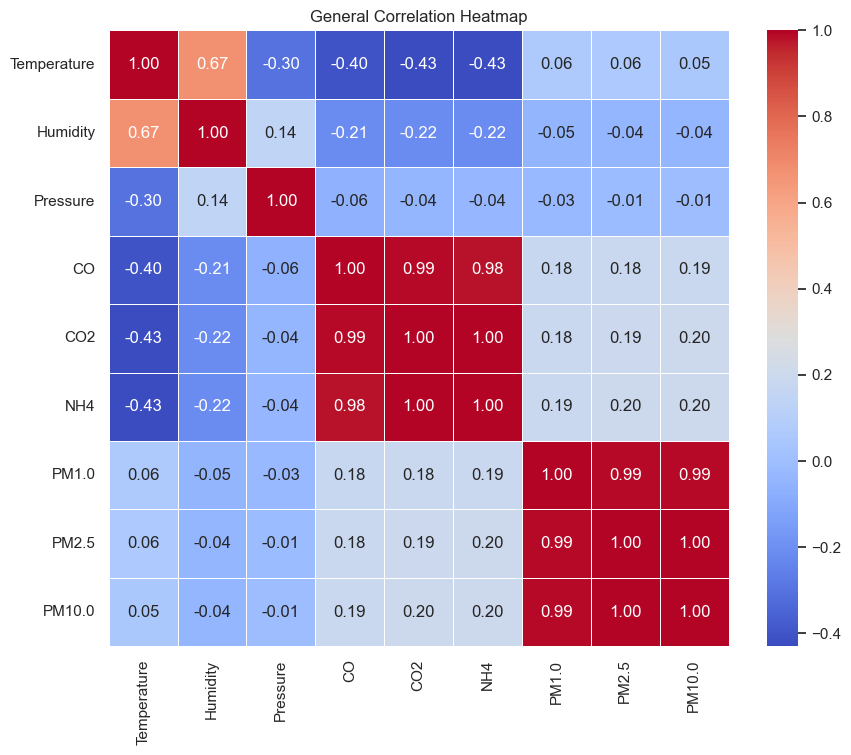

In [23]:
# Calculate the correlation matrix
correlation_matrix = df.drop(['Altitude'], axis=1).corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('General Correlation Heatmap')
plt.show()

# Weather Variables (Temperature and Humidity)

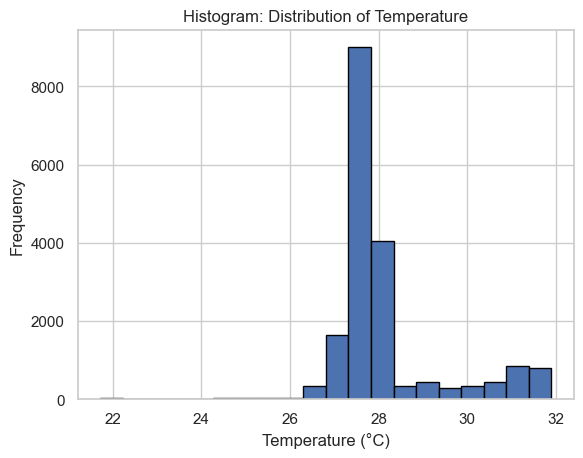

In [56]:
# Histogram: Distribution of Temperature
plt.hist(df['Temperature'], bins=20, edgecolor='black')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Histogram: Distribution of Temperature')
plt.show()

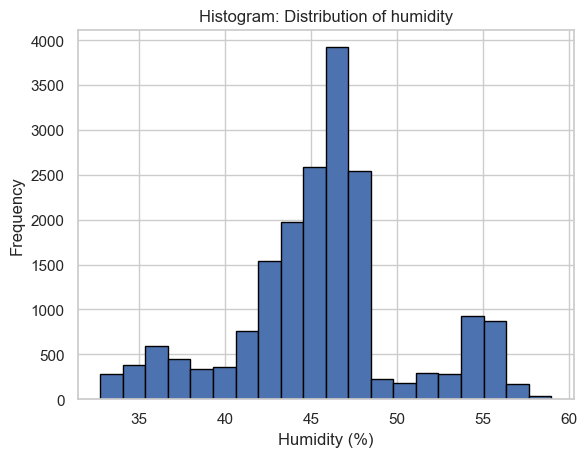

In [57]:
# Histogram: Distribution of Humidity
plt.hist(df['Humidity'], bins=20, edgecolor='black')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')
plt.title('Histogram: Distribution of humidity')
plt.show()

In [106]:
def plot_kde_temperature_vs_pm(data, ptype):
    # Create subplots with 1 row and 3 columns
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

    # List of PM columns
    pm_columns = ['PM1.0', 'PM2.5', 'PM10.0']
    pm_labels = ['PM 1.0', 'PM 2.5', 'PM 10.0']

    uval = ""

    if ptype == "Temperature":
        uval = units[0]
    else:
        uval = units[1]

    # Plot Temperature vs. each PM column using bivariate KDE plots
    for i, pm_column in enumerate(pm_columns):
        sns.kdeplot(data=data, x=ptype, y=pm_column, cmap='coolwarm', fill=True, ax=axes[i])
        axes[i].set_xlabel(f"{ptype} {uval}")
        axes[i].set_ylabel(f"{pm_labels[i]} {units[6]}")
        axes[i].set_title(f'Kernel Density Estimate: {ptype} vs. {pm_labels[i]}')

    # Adjust spacing between subplots
    plt.tight_layout()

    plt.show()



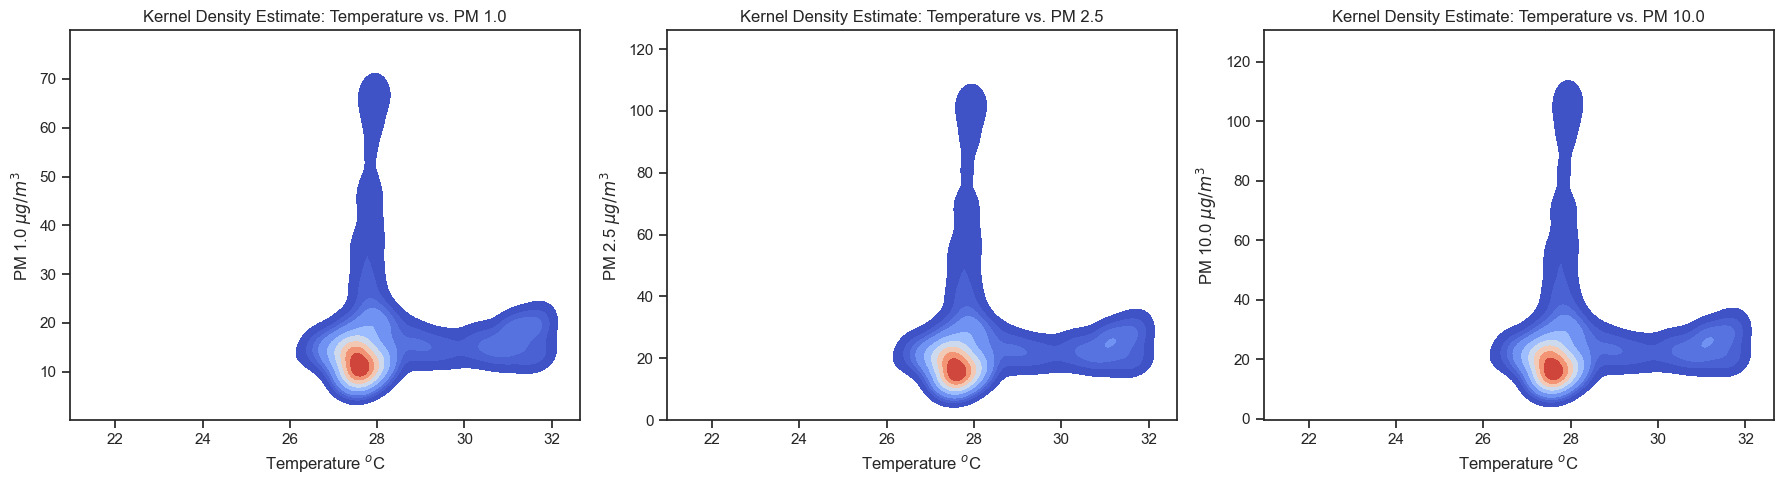

In [107]:
plot_kde_temperature_vs_pm(df, 'Temperature')

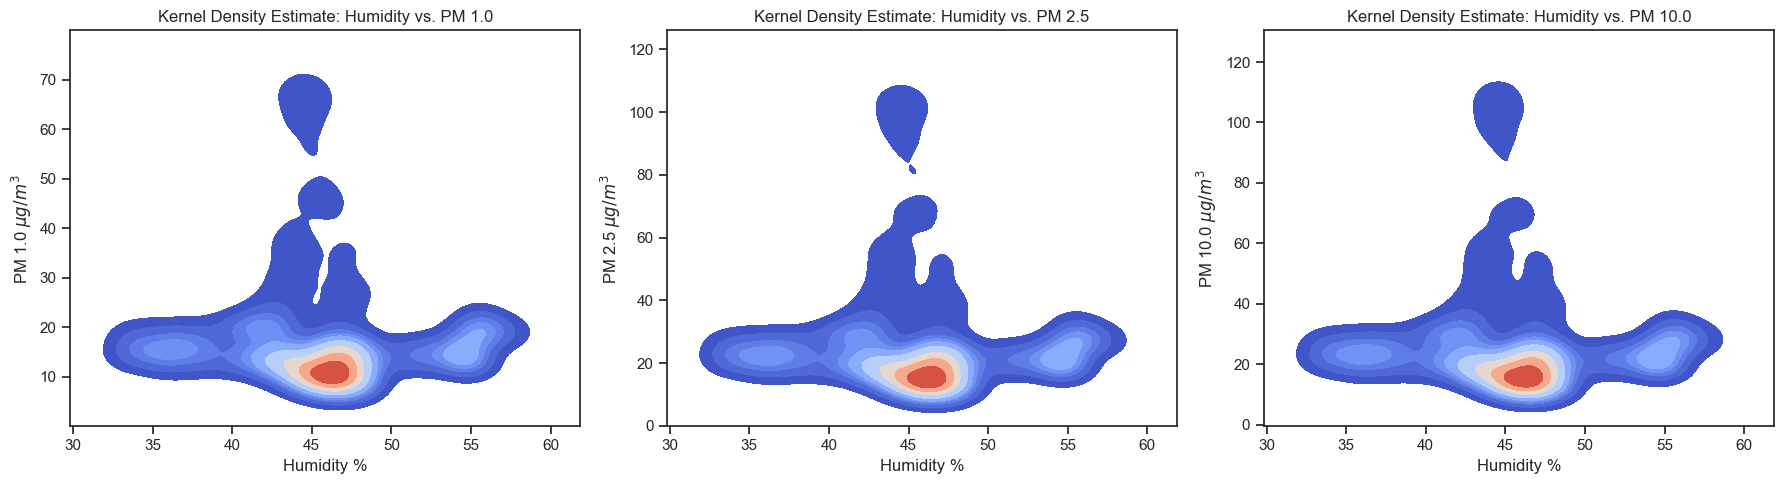

In [108]:
plot_kde_temperature_vs_pm(df, 'Humidity')

In [110]:
def plot_average_pm_by_range(data, range_column, pm_columns, num_bins, title):
    # Define a color palette for the bar plots
    colors = sns.color_palette("mako", len(pm_columns))

    # Create subplots with 1 row and len(pm_columns) columns
    fig, axes = plt.subplots(nrows=1, ncols=len(pm_columns), figsize=(15, 6))

    # List of bins and labels
    bins = pd.cut(data[range_column], bins=num_bins)
    labels = [f'{bin.left}-{bin.right}' for bin in bins.cat.categories]

    # Plot average PM levels for each range for each PM column
    for i, pm_column in enumerate(pm_columns):
        pm_data = data[[range_column, pm_column]]
        average_pm_by_range = pm_data.groupby(bins)[pm_column].mean()
        average_pm_by_range.plot(kind='bar', color=colors[i], alpha=0.7, ax=axes[i])
        axes[i].set_xticklabels(labels, rotation=45)
        axes[i].set_xlabel(f'{range_column} Range')
        axes[i].set_ylabel(f'Average {pm_column} Levels')
        axes[i].set_title(f'Average {pm_column} Levels for Each {range_column} Range')

    # Add a common title for all subplots
    plt.suptitle(title, fontsize=16)

    # Adjust spacing between subplots
    plt.tight_layout()

    plt.show()

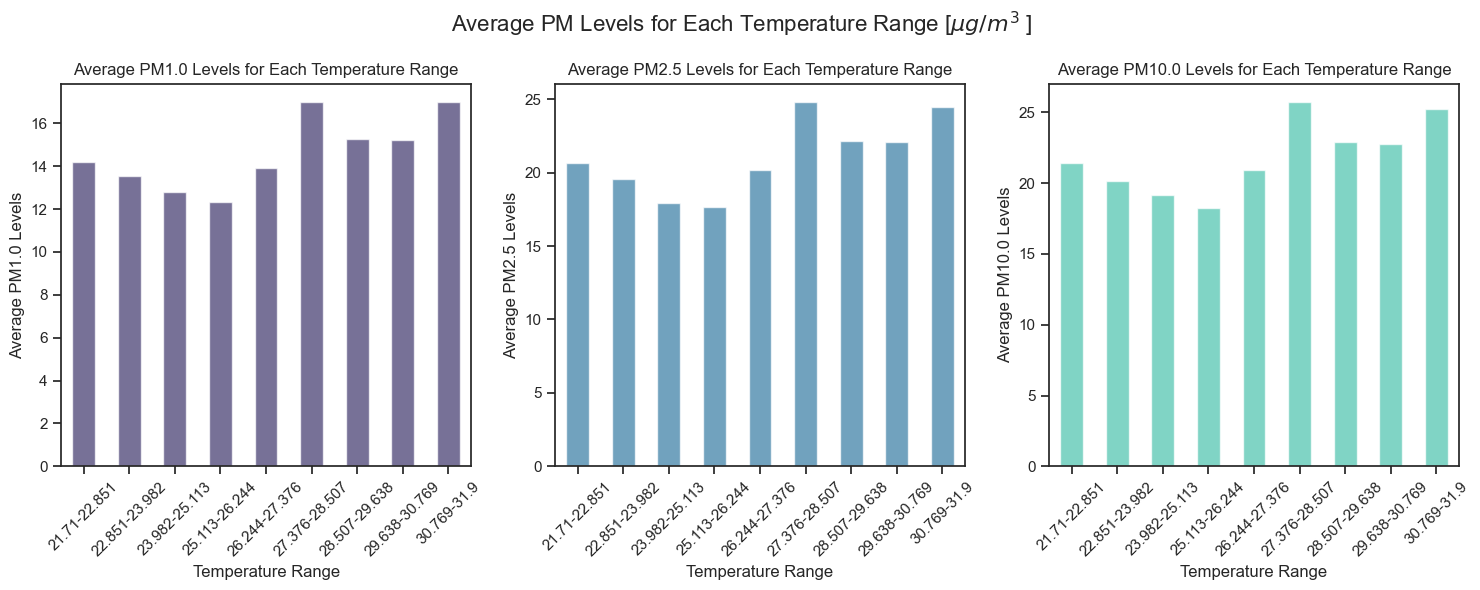

In [111]:
plot_average_pm_by_range(df, 'Temperature', ['PM1.0', 'PM2.5', 'PM10.0'], num_bins=9, title=f'Average PM Levels for Each Temperature Range [{units[6]}]')

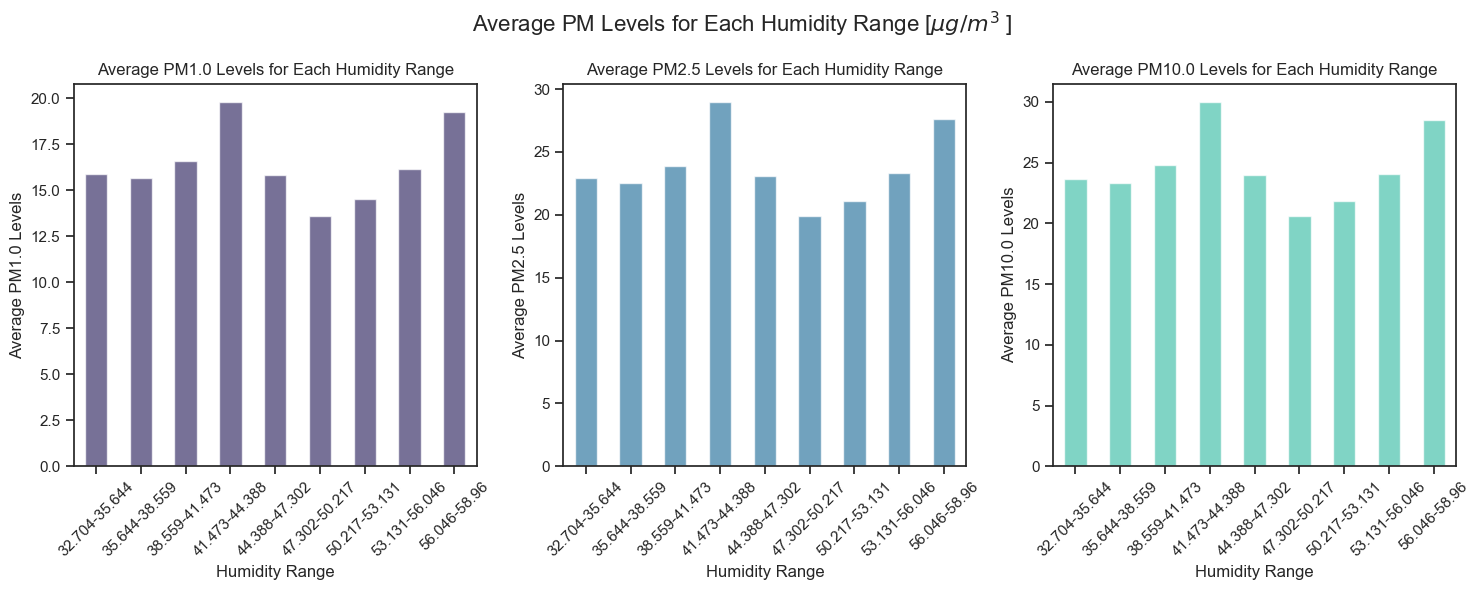

In [112]:
plot_average_pm_by_range(df, 'Humidity', ['PM1.0', 'PM2.5', 'PM10.0'], num_bins=9, title=f'Average PM Levels for Each Humidity Range [{units[6]}]')

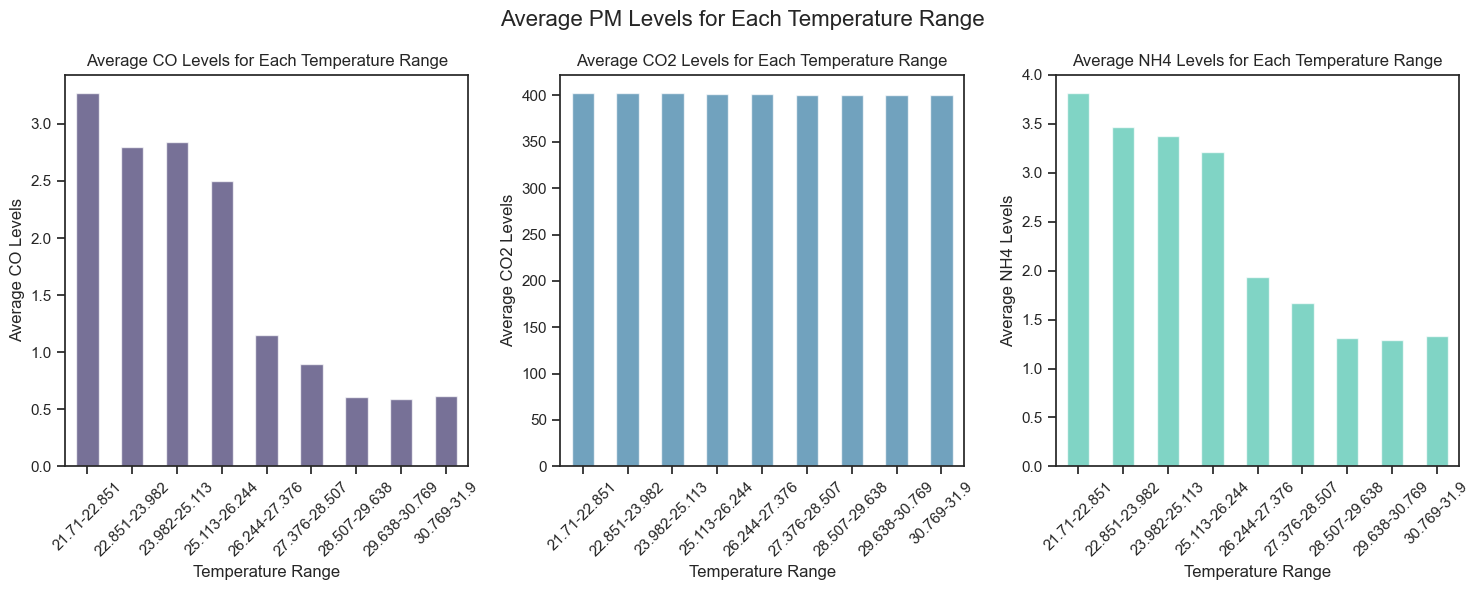

In [113]:
plot_average_pm_by_range(df, 'Temperature', ["CO" ,"CO2" ,"NH4"], num_bins=9, title='Average PM Levels for Each Temperature Range')